Installer les dépendances nécessaires


In [1]:
!pip install transformers torch
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

Charger et nettoyer les données

In [2]:
import pandas as pd
import re

# Charger les données
df = pd.read_csv("/content/drive/My Drive/youtube_comments2.csv")

# Fonction de nettoyage des commentaires
def clean_text(text):
    # Convertir en minuscules
    text = text.lower()

    # Supprimer les liens
    text = re.sub(r"http\S+", "", text)

    # Supprimer les mentions
    text = re.sub(r"@\w+", "", text)

    # Supprimer les caractères spéciaux, y compris les emojis
    text = re.sub(r"[^\x00-\x7F]+", "", text)  # Supprimer les emojis
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # Supprimer les autres caractères spéciaux

    return text.strip()

# Appliquer le nettoyage
df["Cleaned_Comment"] = df["Comment"].astype(str).apply(clean_text)

# Supprimer les commentaires vides
df = df[df["Cleaned_Comment"].str.strip().notna()]

# Supprimer les doublons
df = df.drop_duplicates(subset=["Cleaned_Comment"])

# Afficher un aperçu des premières lignes après nettoyage
df.head()


,Video ID,Video Title,Comment,Cleaned_Comment
0,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"Mais Eric et Ramzy, quand ils partent dans leu...",mais eric et ramzy quand ils partent dans leur...
1,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"La meilleure vidéo de squezzy <a href=""https:/...",la meilleure vido de squezzy a href le meilleu...
2,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"A <a href=""https://www.youtube.com/watch?v=J1Z...",a a href il dit a en verlant cest chaud trop drle
3,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Coucou du coup Éric il a eu 50 000 quoi?,coucou du coup ric il a eu quoi
4,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Chaque année je me refais cet épisode et j&#39...,chaque anne je me refais cet pisode et jen rig...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17895 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Video ID         17895 non-null  object
 1   Video Title      17895 non-null  object
 2   Comment          17895 non-null  object
 3   Cleaned_Comment  17895 non-null  object
dtypes: object(4)
memory usage: 699.0+ KB


Utiliser BERT pour l'analyse de sentiment
On va charger un modèle BERT pré-entraîné pour l'analyse de sentiment. Nous allons utiliser "nlptown/bert-base-multilingual-uncased-sentiment", un modèle de classification des sentiments qui fonctionne en français.

In [6]:
from transformers import pipeline

# Charger le modèle BERT multilingue avec tronquage
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment",
                              tokenizer="nlptown/bert-base-multilingual-uncased-sentiment",
                              device=0)  # Utiliser le GPU si disponible, sinon le CPU

# Appliquer l'analyse de sentiment sur les commentaires nettoyés avec gestion de longueur
def analyze_sentiment(text):
    return sentiment_pipeline(text, truncation=True, max_length=512)[0]['label']

# Appliquer la fonction à chaque commentaire
df["Sentiment"] = df["Cleaned_Comment"].apply(analyze_sentiment)


Device set to use cpu


In [7]:
# Afficher un aperçu des résultats
df.head()

,Video ID,Video Title,Comment,Cleaned_Comment,Sentiment
0,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"Mais Eric et Ramzy, quand ils partent dans leu...",mais eric et ramzy quand ils partent dans leur...,3 stars
1,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"La meilleure vidéo de squezzy <a href=""https:/...",la meilleure vido de squezzy a href le meilleu...,5 stars
2,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"A <a href=""https://www.youtube.com/watch?v=J1Z...",a a href il dit a en verlant cest chaud trop drle,1 star
3,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Coucou du coup Éric il a eu 50 000 quoi?,coucou du coup ric il a eu quoi,1 star
4,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Chaque année je me refais cet épisode et j&#39...,chaque anne je me refais cet pisode et jen rig...,5 stars


Analyser les résultats


In [8]:
# Conversion des labels BERT en catégories simplifiées
def convert_label(label):
    if label == '5 stars':  # Très positif
        return "Positif"
    elif label == '4 stars':  # Positif
        return "Positif"
    elif label == '3 stars':  # Neutre
        return "Neutre"
    elif label == '2 stars':  # Négatif
        return "Négatif"
    elif label == '1 star':  # Très négatif
        return "Négatif"

df["Sentiment"] = df["Sentiment"].apply(convert_label)

# Afficher les premiers résultats
df.head()


,Video ID,Video Title,Comment,Cleaned_Comment,Sentiment
0,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"Mais Eric et Ramzy, quand ils partent dans leu...",mais eric et ramzy quand ils partent dans leur...,Neutre
1,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"La meilleure vidéo de squezzy <a href=""https:/...",la meilleure vido de squezzy a href le meilleu...,Positif
2,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"A <a href=""https://www.youtube.com/watch?v=J1Z...",a a href il dit a en verlant cest chaud trop drle,Négatif
3,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Coucou du coup Éric il a eu 50 000 quoi?,coucou du coup ric il a eu quoi,Négatif
4,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Chaque année je me refais cet épisode et j&#39...,chaque anne je me refais cet pisode et jen rig...,Positif


Visualiser les résultats

<ipython-input-9-679fe297cd10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="coolwarm")


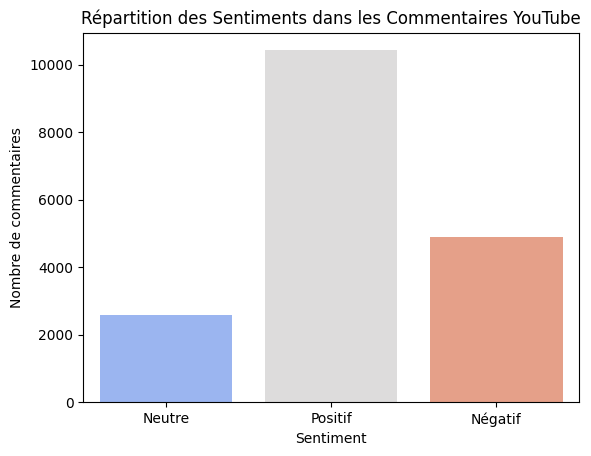

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher un histogramme de la répartition des sentiments
sns.countplot(x=df["Sentiment"], palette="coolwarm")
plt.title("Répartition des Sentiments dans les Commentaires YouTube")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de commentaires")
plt.show()


In [10]:
df.to_csv("/content/drive/My Drive/youtube_comments_with_sentiments.csv", index=False)


Charger les données et visualiser
on charge les données nettoyées et étiquetées.


In [1]:
import pandas as pd

# Charger les données annotées
df = pd.read_csv("/content/drive/My Drive/youtube_comments_with_sentiments.csv")


print(df.info())  # Vérifier les types de données et valeurs manquantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Video ID         17895 non-null  object
 1   Video Title      17895 non-null  object
 2   Comment          17895 non-null  object
 3   Cleaned_Comment  17894 non-null  object
 4   Sentiment        17895 non-null  object
dtypes: object(5)
memory usage: 699.2+ KB
None


In [2]:
import re
import string

# Fonction de nettoyage améliorée
def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r"http\S+", "", text)  # Supprimer les liens
    text = re.sub(r"@\w+", "", text)  # Supprimer les mentions
    text = re.sub(r"#\w+", "", text)  # Supprimer les hashtags
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # Supprimer les caractères spéciaux
    text = re.sub(r"\s+", " ", text).strip()  # Supprimer les espaces en trop
    return text

# Appliquer le nettoyage
df["Cleaned_Comment"] = df["Cleaned_Comment"].astype(str).apply(clean_text)

# Vérifier les modifications
df.head()


,Video ID,Video Title,Comment,Cleaned_Comment,Sentiment
0,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"Mais Eric et Ramzy, quand ils partent dans leu...",mais eric et ramzy quand ils partent dans leur...,Neutre
1,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"La meilleure vidéo de squezzy <a href=""https:/...",la meilleure vido de squezzy a href le meilleu...,Positif
2,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),"A <a href=""https://www.youtube.com/watch?v=J1Z...",a a href il dit a en verlant cest chaud trop drle,Négatif
3,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Coucou du coup Éric il a eu 50 000 quoi?,coucou du coup ric il a eu quoi,Négatif
4,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Chaque année je me refais cet épisode et j&#39...,chaque anne je me refais cet pisode et jen rig...,Positif


In [3]:
# Supprimer les valeurs manquantes (NaN)
df.dropna(subset=["Cleaned_Comment", "Sentiment"], inplace=True)

# Supprimer les doublons basés sur Cleaned_Comment et Sentiment
df.drop_duplicates(subset=["Cleaned_Comment", "Sentiment"], inplace=True)

# Réinitialiser les index après suppression
df.reset_index(drop=True, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17881 entries, 0 to 17880
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Video ID         17881 non-null  object
 1   Video Title      17881 non-null  object
 2   Comment          17881 non-null  object
 3   Cleaned_Comment  17881 non-null  object
 4   Sentiment        17881 non-null  object
dtypes: object(5)
memory usage: 698.6+ KB


Visualisation en cercle (Pie Chart)

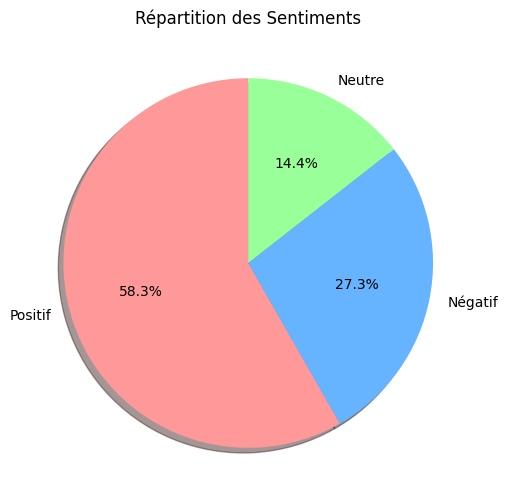

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter les occurrences de chaque sentiment
sentiment_counts = df["Sentiment"].value_counts()

# Couleurs personnalisées
colors = ["#ff9999", "#66b3ff", "#99ff99"]

# Afficher un graphique en camembert
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Répartition des Sentiments")
plt.show()


In [7]:
# Afficher juste le nombre d’occurrences de chaque sentiment
print(sentiment_counts)


Sentiment
Positif    10417
Négatif     4882
Neutre      2582
Name: count, dtype: int64


Sous-échantillonnage (Downsampling)

In [8]:
from sklearn.utils import resample

# Séparer les classes
df_positive = df[df["Sentiment"] == "Positif"]
df_negative = df[df["Sentiment"] == "Négatif"]
df_neutral = df[df["Sentiment"] == "Neutre"]

# Trouver la classe minoritaire
min_size = min(len(df_positive), len(df_neutral))

# Sous-échantillonner toutes les classes à la taille minimale
df_positive_downsampled = resample(df_positive, replace=False, n_samples=min_size, random_state=42)
df_negative_downsampled = resample(df_negative, replace=False, n_samples=min_size, random_state=42)
df_neutral_downsampled = resample(df_neutral, replace=False, n_samples=min_size, random_state=42)

# Concaténer les classes équilibrées
df_balanced = pd.concat([df_positive_downsampled, df_negative_downsampled, df_neutral_downsampled])

# Vérifier la nouvelle distribution
print(df_balanced["Sentiment"].value_counts())


Sentiment
Positif    2582
Négatif    2582
Neutre     2582
Name: count, dtype: int64


Transformer les labels en valeurs numériques

In [10]:
from sklearn.preprocessing import LabelEncoder
# Encoder les labels
label_encoder = LabelEncoder()
df_balanced["Sentiment_Label"] = label_encoder.fit_transform(df_balanced["Sentiment"])

# Vérifier la conversion
print("\nConversion Sentiment -> Sentiment_Label :")
print(df_balanced[["Sentiment", "Sentiment_Label"]].drop_duplicates())



Conversion Sentiment -> Sentiment_Label :
      Sentiment  Sentiment_Label
15654   Positif                2
16844   Négatif                1
4858     Neutre                0


In [11]:
df_balanced

,Video ID,Video Title,Comment,Cleaned_Comment,Sentiment,Sentiment_Label
15654,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),c&#39;est la meilleure vidéo de ce concept vrm,cest la meilleure vido de ce concept vrm,Positif,2
4651,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),C&#39;était le meilleur qui est l&#39;imposteu...,ctait le meilleur qui est limposteur jai fait ...,Positif,2
79,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),😂😂😂😂,nan,Positif,2
7170,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),J’ai tellement rigolé . Best one ☝️,jai tellement rigol best one,Positif,2
8590,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),la meilleur qui est l&#39;imposteur waaaaaa,la meilleur qui est limposteur waaaaaa,Positif,2
...,...,...,...,...,...,...
10573,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Mais art un épisode 1 avec eux,mais art un pisode avec eux,Neutre,0
6888,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Faudras faire un épisode avec les meilleurs jo...,faudras faire un pisode avec les meilleurs jou...,Neutre,0
7127,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),Le montage mais AHAHAHAH,le montage mais ahahahah,Neutre,0
8247,J1Z1A46FknM,QUI EST L'IMPOSTEUR ? (ft Eric & Ramzy),L’épisode était génial,lpisode tait gnial,Neutre,0


Séparer les données en Train & Test
diviser le dataset en train (80%) et test (20%) pour l'entraînement du modèle.

In [13]:
from sklearn.model_selection import train_test_split
# Séparer les features (X) et labels (y)
X = df_balanced["Cleaned_Comment"]
y = df_balanced["Sentiment_Label"]

# Diviser en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des tailles
print(f"\nEntraînement : {len(X_train)} commentaires")
print(f"Test : {len(X_test)} commentaires")


Entraînement : 6196 commentaires
Test : 1550 commentaires


Installer les bibliothèques nécessaires

In [14]:
!pip install transformers datasets torch sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


DistilBERT

In [45]:
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer
# Charger le tokenizer de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokeniser les données
train_encodings = tokenizer(
    X_train.tolist(), truncation=True, padding=True, max_length=256, return_tensors="pt"
)

test_encodings = tokenizer(
    X_test.tolist(), truncation=True, padding=True, max_length=256, return_tensors="pt"
)


Créer un Dataset PyTorch
Nous devons créer un objet Dataset pour gérer les données tokenisées.

In [46]:
import torch
from torch.utils.data import Dataset

class CommentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}  # Correction du warning
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Convertir les données en Dataset
train_dataset = CommentDataset(train_encodings, y_train.tolist())
test_dataset = CommentDataset(test_encodings, y_test.tolist())

Charger le modèle DistilBERT
Nous allons charger un modèle DistilBERT pré-entraîné et l'adapter à notre tâche de classification.

In [48]:
from transformers import DistilBertForSequenceClassification, DistilBertConfig

# Créer la configuration avec dropout
config = DistilBertConfig.from_pretrained(
    'distilbert-base-uncased',
    num_labels=3,
    dropout=0.3,  # Applique dropout aux couches entièrement connectées
    attention_dropout=0.3  # Applique dropout aux poids de l'attention
)

# Charger le modèle avec cette configuration
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    config=config
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Définir les arguments d'entraînement
Nous allons configurer les hyperparamètres pour l'entraînement.

In [49]:
training_args = TrainingArguments(
    output_dir='/content/drive/My Drive/results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,              #  Réduire le nombre d’époques
    weight_decay=0.01,
    save_strategy="steps",           #  Sauvegarder toutes les 500 étapes plutôt qu’à chaque époque
    save_steps=500,
    logging_dir='/content/drive/My Drive/logs',
    logging_steps=10,
    report_to="none",
    lr_scheduler_type="linear",       #  Ajout d'un scheduler pour diminuer le LR progressivement
    warmup_ratio=0.1                  #  Permet d’avoir un démarrage progressif du LR
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Créer un Trainer

In [50]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,                         # Le modèle à entraîner
    args=training_args,                  # Les arguments d'entraînement
    train_dataset=train_dataset,         # Données d'entraînement
    eval_dataset=test_dataset,           # Données de test
    compute_metrics=compute_metrics      # Fonction pour calculer les métriques
)

In [51]:
import os
os.environ["WANDB_DISABLED"] = "true"


Entraîner le modèle

In [63]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.799700,0.854979,0.638065,0.637690,0.681795,0.638065
2,0.733000,0.786845,0.676129,0.678894,0.691433,0.676129
3,0.543400,0.795662,0.668387,0.666626,0.678776,0.668387


TrainOutput(global_step=1164, training_loss=0.6759300092651263, metrics={'train_runtime': 425.1369, 'train_samples_per_second': 43.722, 'train_steps_per_second': 2.738, 'total_flos': 1231173958957056.0, 'train_loss': 0.6759300092651263, 'epoch': 3.0})

Évaluer le modèle

In [64]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.7956622242927551, 'eval_accuracy': 0.6683870967741935, 'eval_f1': 0.6666264472354625, 'eval_precision': 0.6787755384531426, 'eval_recall': 0.6683870967741935, 'eval_runtime': 9.8916, 'eval_samples_per_second': 156.698, 'eval_steps_per_second': 9.806, 'epoch': 3.0}


Afficher les courbes de loss et d'accuracy

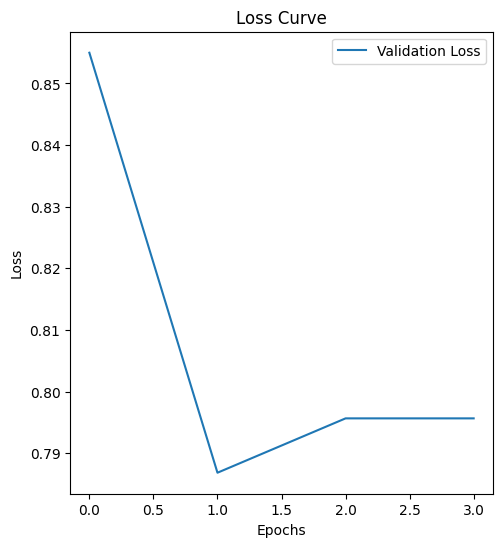

In [65]:
import matplotlib.pyplot as plt

# Récupérer l'historique d'entraînement
history = trainer.state.log_history

# Extraire les valeurs de loss et d'accuracy
train_loss = [log['loss'] for log in history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in history if 'eval_loss' in log]
eval_accuracy = [log['eval_accuracy'] for log in history if 'eval_accuracy' in log]

# Afficher la courbe de loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
#plt.plot(train_loss, label='Train Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


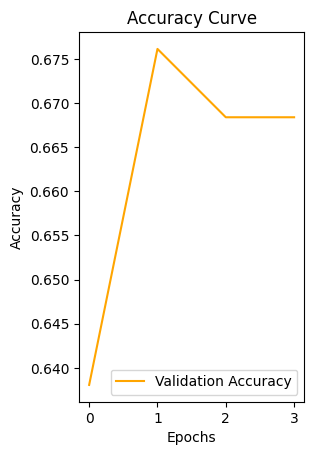

In [66]:
# Afficher la courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(eval_accuracy, label='Validation Accuracy', color='orange')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Faire des prédictions

In [61]:
import torch

def predict_sentiment(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Détecter GPU ou CPU
    model.to(device)  # Placer le modèle sur l'appareil

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Déplacer les entrées sur le même device

    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    pred_label = torch.argmax(probs, dim=1).item()

    return label_encoder.inverse_transform([pred_label])[0]

# Exemple de prédiction
comment = "This video is amazing!"
print(f"Sentiment: {predict_sentiment(comment)}")


Sentiment: Positif


Sauvegarder le modèle et le tokenizer

In [62]:
# Sauvegarder le modèle
model.save_pretrained('/content/drive/My Drive/sentiment_model')

# Sauvegarder le tokenizer
tokenizer.save_pretrained('/content/drive/My Drive/sentiment_model')

('/content/drive/My Drive/sentiment_model/tokenizer_config.json',
 '/content/drive/My Drive/sentiment_model/special_tokens_map.json',
 '/content/drive/My Drive/sentiment_model/vocab.txt',
 '/content/drive/My Drive/sentiment_model/added_tokens.json')